# EXPLORATORY DATA ANALYSIS DI PYTHON
Exploratory Data Analysis atau (EDA) adalah proses analisis untuk memahami karakteristik data, dan hal yang perlu dilakukan agar data dapat digunakan untuk proses pembelajaran model.

# IMPORT LIBRARIES DAN LOAD DATASET

In [2]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('Session 29 botak.csv')

# Descriptive Statistics
Statistik deskriptif berfungsi untuk mendeskripsikan atau memberi gambaran terhadap objek yang diteliti melalui data sampel atau populasi (Sugiyono, 2007).

## 1. Melihat data secara sekilas
Dapat menggunakan beberapa cara 
- `df.head(n)` melihat n baris pertama
- `df.sampel(n)` melihat n sampel data secara acak
- `df.tail(n)`melihat n baris terakhir

Bertujuan
- melihat konsistensi nama kolom dan isi kolom

In [3]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
0,42.0,Laki-laki,PNS,Padang,7.864005e+06,0,0.0,61.928685,152.174164,Deadbuoy,1,S1,0.487655
1,33.0,Laki-laki,Pegawai swasta,Palangkaraya,6.492662e+06,0,0.0,49.374507,152.822969,Moonsilk,1,SMA,0.297270
2,59.0,Laki-laki,Freelance,Serang,8.086303e+06,1,0.0,59.072807,159.911047,Merpati,1,S1,0.467848
3,38.0,Laki-laki,Pegawai swasta,Gorontalo,1.147321e+07,0,1.0,68.338014,162.558997,Moonsilk,0,S1,0.616418
4,33.0,Perempuan,Freelance,Tanjungselor,1.475942e+07,0,0.0,53.769996,154.579510,Pantone,1,S2,0.115439


## 2. Memeriksa kolom dan baris dengan `df.info()`
Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data, dan jumlah nilai yang hilang dengan menggunakan `df.info()`.
- apakah ada data dengan tipe data yang kurang sesuai?
- apakah ada data yang hilang?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7835 entries, 0 to 7834
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7835 non-null   float64
 1   jenis_kelamin  7826 non-null   object 
 2   pekerjaan      7770 non-null   object 
 3   provinsi       7835 non-null   object 
 4   gaji           7835 non-null   float64
 5   is_menikah     7835 non-null   int64  
 6   is_keturunan   7820 non-null   float64
 7   berat          7835 non-null   float64
 8   tinggi         7835 non-null   float64
 9   sampo          7835 non-null   object 
 10  is_merokok     7835 non-null   int64  
 11  pendidikan     7835 non-null   object 
 12  botak_prob     7835 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 795.9+ KB


Kita dapat melihat bahwa:
* Dataframe memiliki total 7835 baris dan 13 kolom
* Dataframe masih memiliki *null* values di kolom `jenis_kelamin`, `pekerjaan`, dan `is_keturunan`
* Target klasifikasi sepertinya adalah kolom `botak_prob` dengan tipe data `float64`

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

Menyimpan nama kolom berdasarkan tipe *numeric* dan *categorical* seperti di atas tidak wajib

In [5]:
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan', 'provinsi']
nums = ['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'botak_prob']

In [9]:
cats

['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan', 'provinsi']

In [10]:
nums

['umur',
 'gaji',
 'is_menikah',
 'is_keturunan',
 'berat',
 'tinggi',
 'is_merokok',
 'botak_prob']

## 3.Statistical summary dengan `df.describe()`
`df.describe()` bertujuan mengeluarkan ringksan statistik

`feature` numeric akan mengeluarkan Count data, mean, std, min, quartil, dan nilai max

yang perlu diperhatikan
- Apakah nilai ringksan statistik masih masuk akal?
- Apakah nilai `min` dan `max` dalam batas wajar?. Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Bagaimana sebaran nilai `mean` dan `median`. Perbedaan kedua nilai ini mengindikasikan Outlier atau skewed Distribution

`feature` category akan mengeluarkan Count data, unique, top, dan freq

yang perlu diperhatikan
- Apakah jumlah Unique values masuk akal?
- Apakah nilai `freq` terlalu timpang?
Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

In [11]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,7835.000000,7.835000e+03,7835.000000,7820.000000,7835.000000,7835.000000,7835.000000,7835.000000
mean,39.610593,9.462731e+06,0.030249,0.193606,56.453707,157.553910,0.500574,0.396235
std,10.000389,4.789580e+06,0.171282,0.395149,9.608409,6.578341,0.500032,0.190910
min,3.000000,1.500000e+06,0.000000,0.000000,40.000000,136.197006,0.000000,-0.115700
25%,33.000000,6.118801e+06,0.000000,0.000000,49.911307,153.093636,0.000000,0.261511
50%,40.000000,8.407749e+06,0.000000,0.000000,54.228160,157.216686,1.000000,0.373095
75%,46.000000,1.154471e+07,0.000000,0.000000,60.721357,161.558690,1.000000,0.512375
max,78.000000,5.000000e+07,1.000000,1.000000,150.000000,200.225925,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `umur` dan `gaji` terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
* Ada baris yang memiliki probability `botak_prob` minus. Baris ini harus dihilangkan di tahap pre-processing nanti

In [12]:
df[cats].describe()

,jenis_kelamin,pekerjaan,sampo,pendidikan,provinsi
count,7826,7770,7835,7835,7835
unique,2,4,5,6,34
top,Laki-laki,PNS,Merpati,S1,Banda Lampung
freq,5239,3129,1620,4324,259


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah Laki-laki (Top kolom `jenis_kelamin` adalah `Laki-laki` dengan frekuensi 655)
* Kolom `provinsi` memiliki jumlah nilai unik yang banyak;ada kemungkinan tidak terlalu berguna untuk klasifikasi
* Sebaran nilai di kolom `jenis_kelamin`, `provinsi` dan `sampo` terlihat merata, sedangkan `pekerjaan` dan `pendidikan` terlihat didominasi nilai tertentu

## Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom *categorical* di atas dengan value counting

In [13]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom jenis_kelamin:
Laki-laki    5239
Perempuan    2587
Name: jenis_kelamin, dtype: int64

Value count kolom pekerjaan:
PNS               3129
Pegawai swasta    3125
Freelance         1208
Pengangguran       308
Name: pekerjaan, dtype: int64

Value count kolom sampo:
Merpati            1620
Pantone            1576
Deadbuoy           1562
Moonsilk           1550
Shoulder & Head    1527
Name: sampo, dtype: int64

Value count kolom pendidikan:
S1     4324
SMA    1974
S2      640
SMP     538
SD      212
S3      147
Name: pendidikan, dtype: int64

Value count kolom provinsi:
Banda Lampung     259
Denpasar          257
Pangkalpinang     254
Tanjungselor      254
Serang            252
Banda Aceh        252
Pekanbaru         251
Sofifi            248
Samarinda         247
Ambon             242
Manado            240
Mamuju            239
Tanjung Pinang    235
Jakarta           235
Banjarmasin       235
Mataram           234
Pontianak         234
Kupang            230
Semarang      

In [16]:
for col in cats:
    print(f'''Value unique {col}:''')
    print(df[col].unique())
    print()

Value unique jenis_kelamin:
['Laki-laki' 'Perempuan' nan]

Value unique pekerjaan:
['PNS' 'Pegawai swasta' 'Freelance' 'Pengangguran' nan]

Value unique sampo:
['Deadbuoy' 'Moonsilk' 'Merpati' 'Pantone' 'Shoulder & Head']

Value unique pendidikan:
['S1' 'SMA' 'S2' 'SMP' 'SD' 'S3']

Value unique provinsi:
['Padang' 'Palangkaraya' 'Serang' 'Gorontalo' 'Tanjungselor' 'Manado'
 'Jakarta' 'Mataram' 'Samarinda' 'Palembang' 'Semarang' 'Yogyakarta'
 'Medan' 'Tanjung Pinang' 'Mamuju' 'Banda Lampung' 'Palu' 'Ambon'
 'Banjarmasin' 'Banda Aceh' 'Bandung' 'Pekanbaru' 'Pangkalpinang'
 'Surabaya' 'Pontianak' 'Sofifi' 'Kendari' 'Jayapura' 'Manokwari'
 'Denpasar' 'Kupang' 'Jambi' 'Makassar' 'Bengkulu']



# Univariate Analysis
Setelah melakukan analisis statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

# 1. Detecting Outliers
Outliers adalah suatu titik atau kumpulan titik yang berbeda dari titik lainnya, terkadang bisa sangat tinggi atau sangat rendah.
Usahakan untuk mendeteksi dan menghapus outlier karena outlier adalah salah satu alasan utama model bisa kurang akurat. Oleh karena itu, ada baiknya untuk menghapusnya. Deteksi dan penghapusan outlier yang akan saya lakukan disebut teknik skor IQR. Umumnya outlier dapat dilihat dengan visualisasi menggunakan `box plot`. 

`Outlier = 1.5 X IQR`

## Box plots

C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/3813311014.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/3813311014.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/3813311014.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/3813311014.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/3813311014.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to

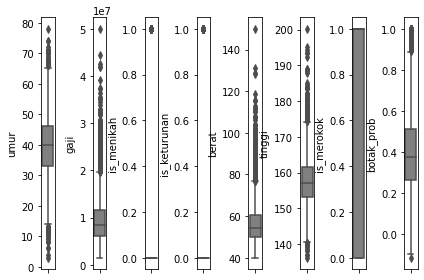

In [17]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `gaji` dan `berat`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `gaji`, `berat`, `tinggi`

# 2. Distribusi Data

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom?
`Apakah normal? Positive skewed? Negative skewed? Bimodal?`
- Apakah ada nilai-nilai tertentu yang umum?
`Lonjakan pada distribution plot mungkin memiliki makna tertentu`

## Dist plots

C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/2389822063.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
D:\Anacondaa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\AppData\Local\Temp/ipykernel_2696/2389822063.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
D:\Anacondaa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed 

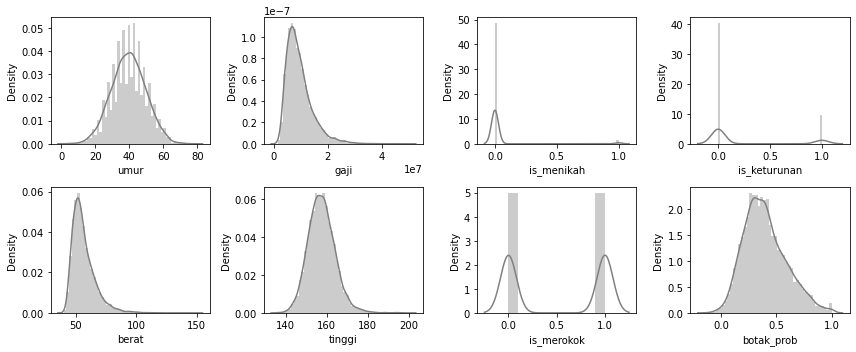

In [18]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `gaji`, `berat`, dan `tinggi` sedikit *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja

## Violin plots
Alternatif dari kedua plot di atas adalah violin plot. Dengan melihat violin plot di atas, *insight* yang kita temukan ketika melihat box plot dan distribution plot juga dapat diamati.

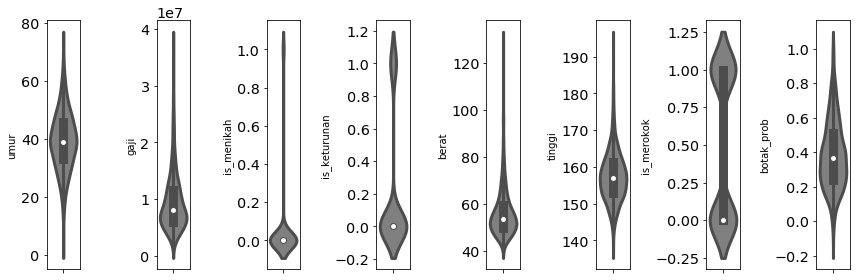

In [14]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

## Count plot (categorical)
Untuk nilai Categorical menggunakan Count Plot

Yang perlu diperhatikan:
- `Ketimpangan antar kategori, terutama pada target`
Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan 
feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

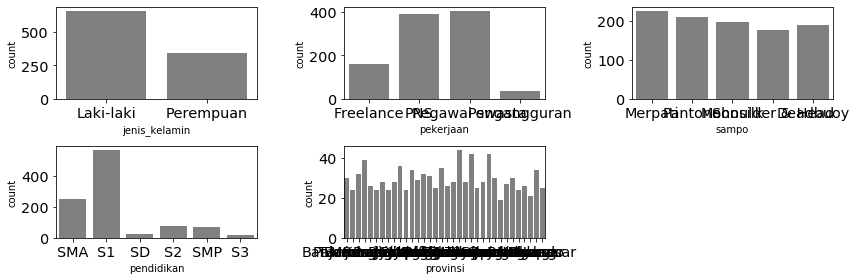

In [15]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='gray', orient='v')
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi `pendidikan` dan `pekerjaan` didominasi 1-2 value.


# Multivariate Analysis

Multivariate Analysis adalah analisis beberapa kolom sekaligus untuk mencari hubungan antar kolom
Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

## 1. `Correlation heatmap`
untuk melihat hubungan/Korelasi antar kolom dapat menggunakan `Correlation heatmap` dengan `df.corr()` 

Yang perlu diperhatikan:
- `Apakah feature memiliki korelasi dengan target?` Bila tidak, maka model linear tidak dapat digunakan
- `Apakah ada 2 feature yang berkorelasi kuat (>0.7)?` Bila ya, ada kemungkinan besar kedua feature tersebut redunda

In [27]:
df.corr()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
umur,1.000000,-0.014180,0.395139,-0.004156,-0.015868,-0.002377,-0.012527,0.337808
gaji,-0.014180,1.000000,-0.009721,0.013193,-0.003752,-0.007369,0.018490,0.064465
is_menikah,0.395139,-0.009721,1.000000,0.013433,-0.010665,0.004940,0.009485,0.224767
is_keturunan,-0.004156,0.013193,0.013433,1.000000,0.011451,0.009515,0.006368,0.624617
berat,-0.015868,-0.003752,-0.010665,0.011451,1.000000,0.652470,-0.005578,0.005624
tinggi,-0.002377,-0.007369,0.004940,0.009515,0.652470,1.000000,0.006685,0.010359
is_merokok,-0.012527,0.018490,0.009485,0.006368,-0.005578,0.006685,1.000000,0.266257
botak_prob,0.337808,0.064465,0.224767,0.624617,0.005624,0.010359,0.266257,1.000000


<AxesSubplot:>

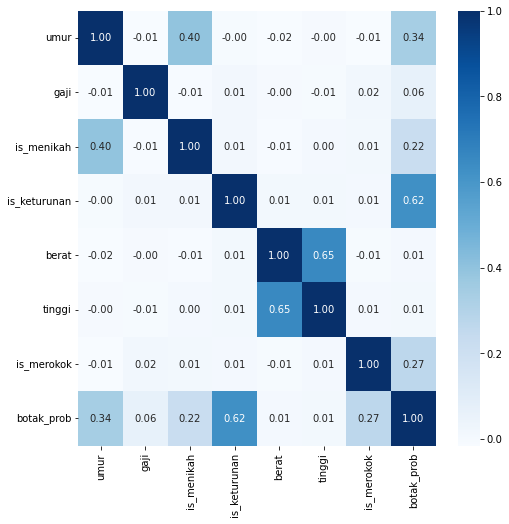

In [17]:
# untuk memudahkan Visualisasi korelasi antar kolom dengan sns.heatmap(df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `botak_prob` memiliki korelasi positif lemah dengan `umur`, `is_menikah`, dan `is_merokok`
* Ia juga memiliki korelasi positif kuat dengan `is_keturunan`
* `tinggi` juga memiliki korelasi positif kuat dengan `berat`. Ada kemungkinan kedua *feature* ini redundan
* `is_menikah` memiliki korelasi dengan `umur`, namun korelasi ini lemah

## 2. `Pair plot`
Pair plot memungkinkan kita untuk melihat distribusi variabel tunggal dan hubungan antara dua variabel.Pair plot adalah metode yang bagus untuk mengidentifikasi tren untuk analisis tindak lanjut

- `Apakah ada scatter plot yang menunjukkan cluster?` Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru

<Figure size 1080x1080 with 0 Axes>

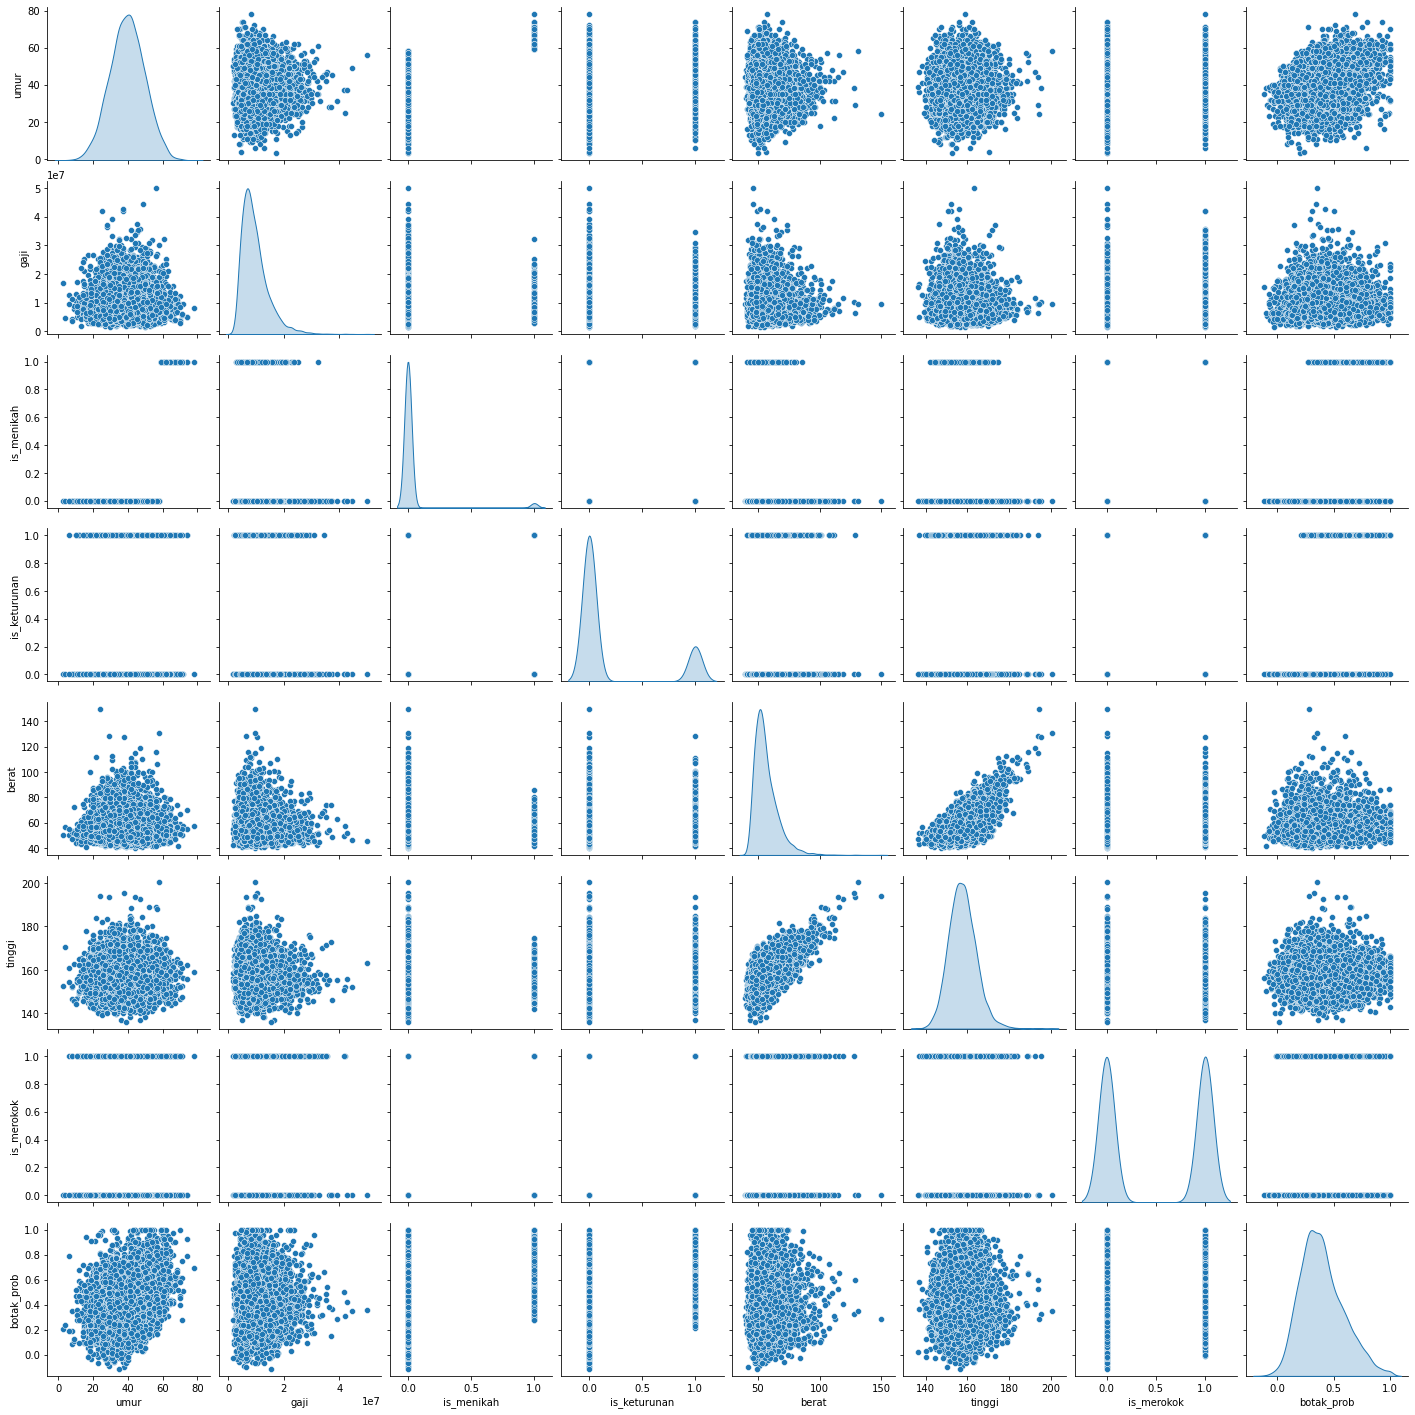

In [18]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:
* `botak_prob` cenderung lebih tinggi untuk orang yang sudah menikah, merokok, atau memiliki keturunan
* `tinggi` dan `berat` sangat jelas memiliki korelasi linear

# 3. Pair plot + Hue

parameter hue memberikan warna 
yang berbeda untuk setiap 
kemungkinan nilai target

<Figure size 1080x1080 with 0 Axes>

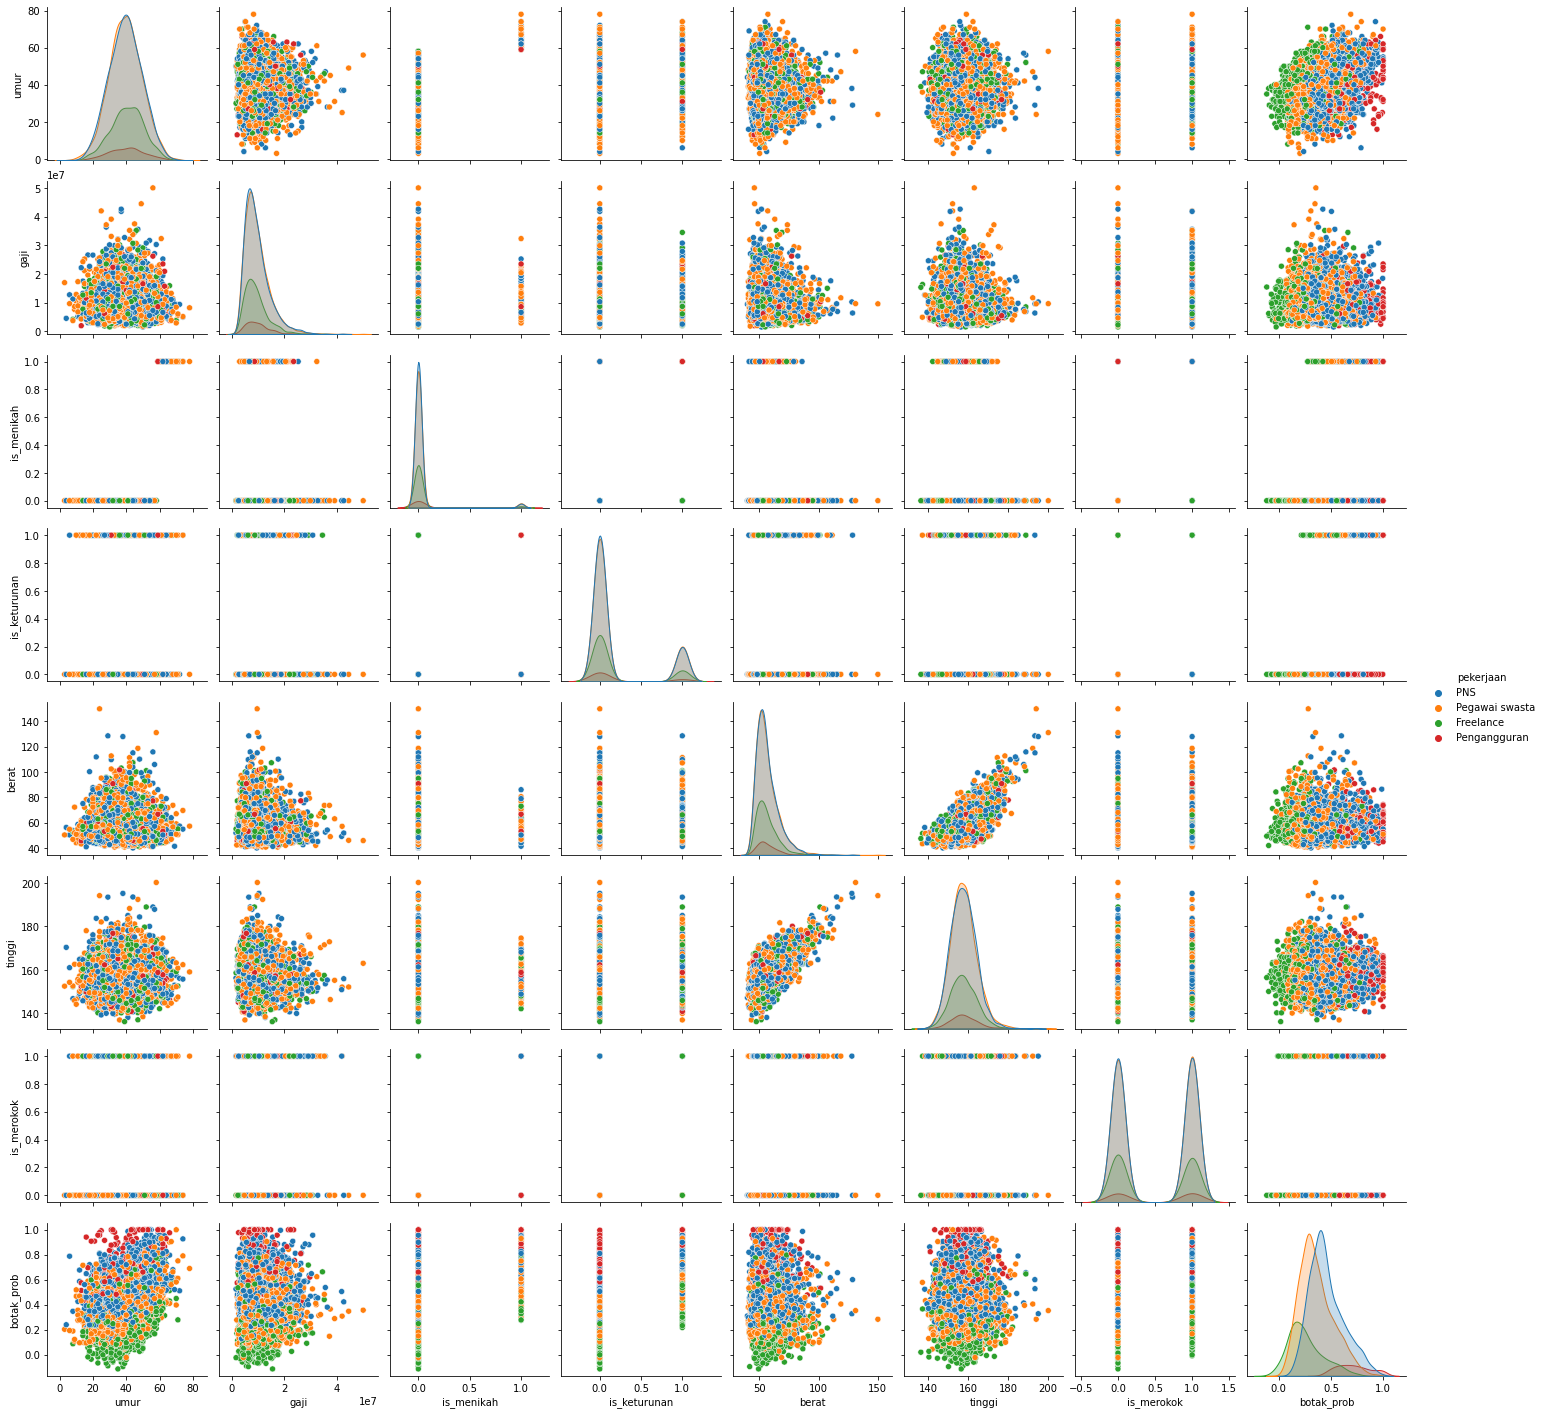

In [34]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='pekerjaan')

## 3. `Category plots`
Terakhir kita tampilkan *category plot* untuk setiap pasangan kategori *numeric* dan *categorical* seperti di bawah ini

Yang perlu diperhatikan:
- Apakah feature categorical memiliki korelasi dengan target?
- Apakah ada 2 feature categorical yang terlihat jelas berkorelasi?

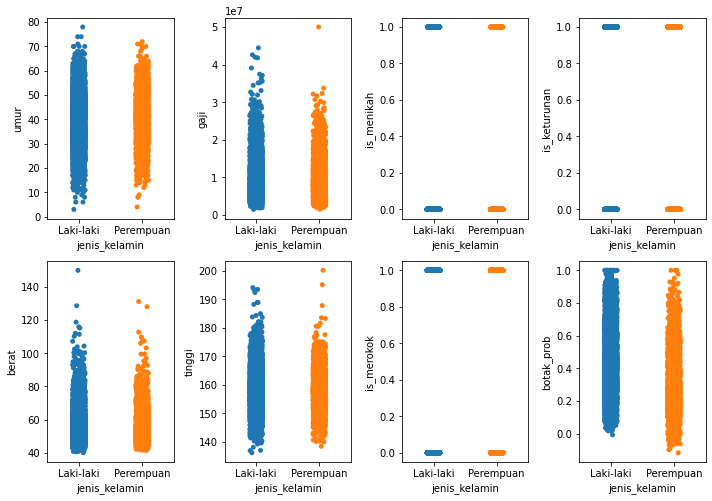

In [21]:
    fig = plt.figure(figsize=(10, 10))
    for i in range(0, len(nums)): # untuk setiap kolom numerik
        ax = fig.add_subplot(3, 4, i+1) # kita set posisi catplot/stripplotnya di layout
        sns.stripplot(ax=ax, data=df, x='jenis_kelamin', y=nums[i]) # gambar catplot/stripplotnya
        plt.tight_layout() # layout

    #if i != 0: plt.close(i+1) # close figure 
    #plt.close(len(nums) + 1) # close figure 

Terlihat bahwa jenis kelamin tidak memiliki korelasi apapun dengan kolom numerik.

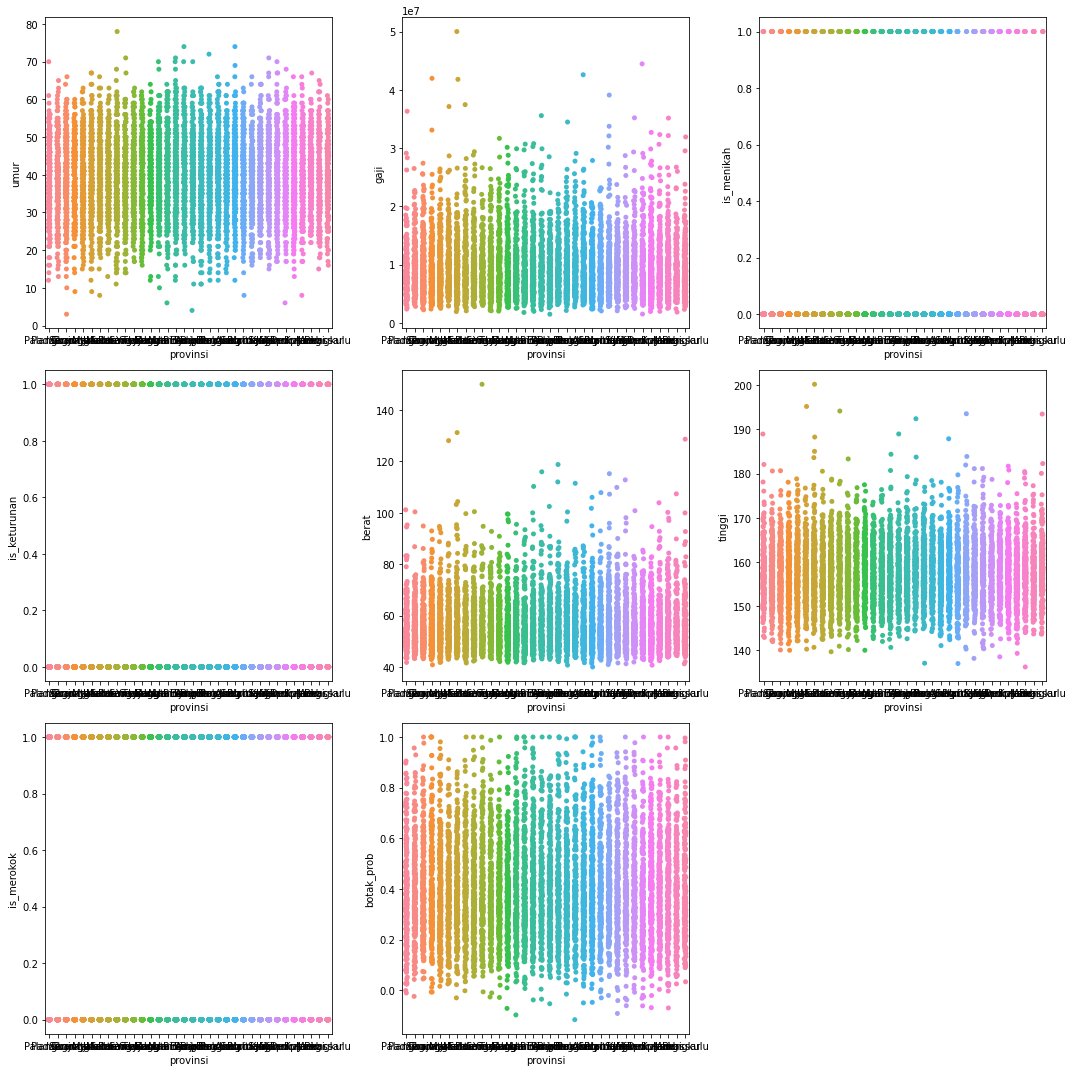

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='provinsi', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Begitupun `propinsi`. Sepertinya kedua *feature* ini dapat kita abaikan dalam proses modeling nanti. 

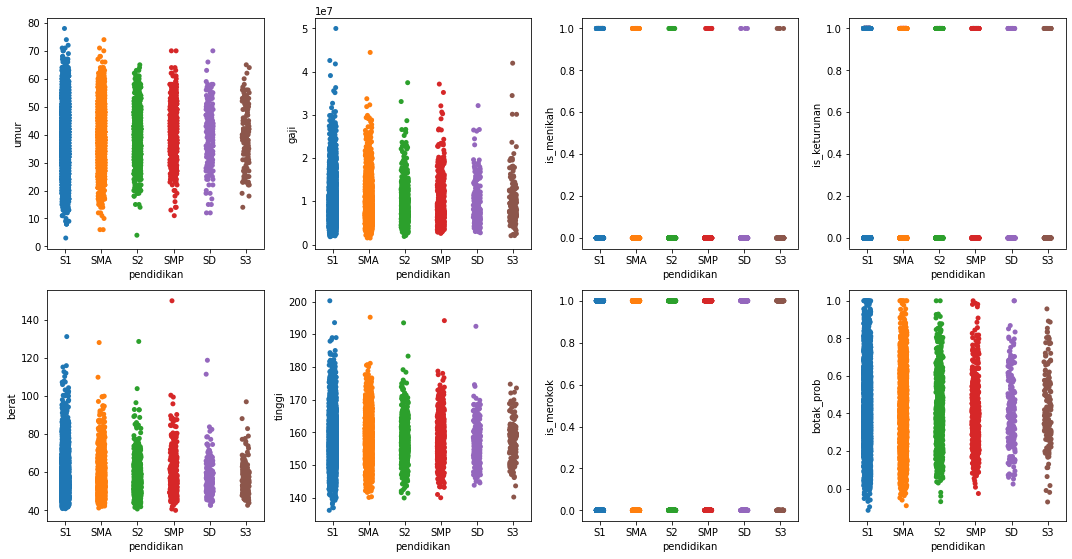

In [30]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='pendidikan', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

`pendidikan` terlihat berhubungan dengan `gaji`, terutama orang-orang dengan pendidikan S3. Meski begitu, jumlah sampel yang sedikit berarti kita harus berhati-hati. 

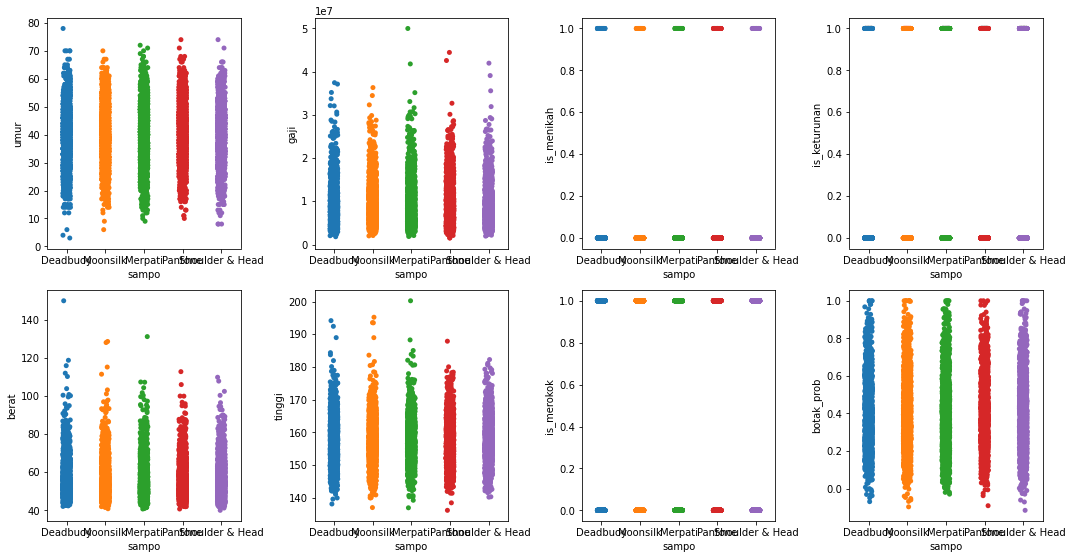

In [31]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(4, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='sampo', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

`Sampo` juga terlihat tidak memiliki korelasi yang berarti dengan kolom numerik apapun dan dapat kita abaikan dalam proses modeling nanti. 

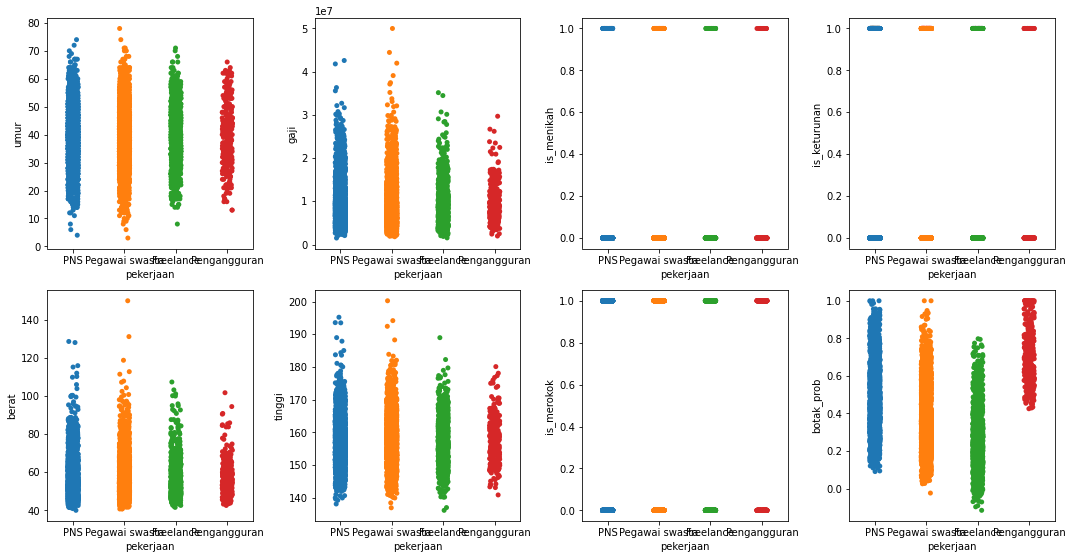

In [28]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='pekerjaan', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Satu hal yang sangat jelas dari `pekerjaan` adalah orang Pengangguran memiliki kemungkinan botak yang lebih tinggi.

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan
* Namun masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan
* Ada feature yang korelasinya tinggi satu sama lain (berat/tinggi) mungkin cuma akan dipakai satu